# CiS - Projekt

Micha von der Osten-Sacken<br>
Timo Wacke

## <b>Numerische Berechnung von Planetenbahnen<b>

## Solarsystem

Um ein Solarsystem nach dem Vorbild des Unseren zu simulieren haben wir in der Datei Solar.py die Massen, 
Distanzen zur Sonne und Bahngeschwindigkeiten von den Planeten und unserem Mond definiert.

In [9]:
#verify that Solar.py and progressBar.py are in the same directory as this jupyter Notebook
import Solar as sol 
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import src.ProgressBar

## Verfahren
Die Bewegungsgleichung für 3 oder mehr Körper lässt sich im Allgemeinen nicht analytisch lösen.<br>
Numerisch gibt es verschieden Anstäze:

<b>Trivial Euler Verfahren:</b>

Zu einer Startposition $\vec{r}(0)$ mit gegebenem $\vec{v}(0)$ und einem gewählten Zeitschritt $dt$, berechnet man iterativ die Koordinaten für die folgenden Koordinaten nach der Vorschrift:
$$\vec{r}(t+dt)=\vec{r}(t) + dt \cdot \vec{v}(t)$$
wobei sich jeweils das neue $\vec{v}(t)$ für einen nächsten Schritt aus der Kraft $\vec{F}(r)$ welche bei $\vec{r}(t)$ auf den Körper wirkt berechnet.
$$\vec{a}=\vec{F}/m \\ \vec{v}(t+dt)=\vec{v}(t)+\vec{a}(t+dt) \cdot dt$$
Um die weiteren Zeitschritte zu berechnen, ist das erfahren zu Widerholen bzw. $t=t+dt$ zu setzen.<br>
Dieses Verfahren ist aber sehr instabil, denn selbst bei einer konstanten Beschleunigung ist die Geschwindigkeit mit der bei einem Zeitschritt gerechnet wird immer nur für den Anfangszeitpunkt des Zeitschrittes exakt und danach immer zu wenig in die beschleunigte Richtung. Für eine konstante Kraft kommt so in jedem Zeitschritt der gleiche Fehler hinzu und der summiert sich auf und wird immer größer. Beim Beispiel der Planetenbewegung ist die Kraft zwar nicht konstant, aber immer nach innen gerichtet, sodass der Planet bei dem Verfahren immer nicht weit genug nach innen beschleunigt wird, und immer weiter nach außen wegdriftet.
Berechnet man zu erst $\vec{v}(t + dt)$ und mit dieser Geschwindigkeit dann $\vec{r}(t + dt)$ so wird die Beschleunigung zu weit nach innen gerichtet sein, und der Planet immer weiter nach innen driften.<br>
<br>
Durch möglichst kleine Zeitschritte lässt sich der Fehler und damit der Drift zwar minimieren aber nicht beseitigen.
Vergleichbar mit der Unter und Obersumme beim Integrieren.

<b>Besser Verlet Verfahren:</b>

Vor dem ersten Schritt berechnet man die Kraft $\vec{F}(r)$ und die daraus resultierende Beschleunigung $\vec{a}=\vec{F}/m$ die auf den Körper an den entsprechenden Startkoordinaten wirkt.<br>
Dann passt man die Geschwindigkeit nur um die Beschleunigung für einen halben Zeitschritt an: $$\vec{v}(t + ½ dt) = \vec{v}(t) + ½ dt \cdot \vec{a}(t).$$
Wenn wir von nun an $\vec{r}(t + dt)$ berechnen machen wir das auf der Grundlage von $\vec{v}(t + ½ dt )$<br>
Und wenn wir $\vec{v}(t + dt + ½ dt )$ berechnen machen wir das auf der Grundlage von $\vec{F}(t + dt)$.<br>
Dann werden in jedem Zeitschritt die Koordinaten $$\vec{r}(t+dt)=\vec{r}(t)+\vec{v}(t+½ \cdot dt) \cdot dt$$ anhand der Geschwindigkeit zum Zeitpunkt in der Mitte des Zeitschrittes berechnet. Und die Geschwindigkeit $$\vec{v}(t+3/2 \cdot dt)=\vec{v}(t+½ \cdot dt)+\vec{a}(t+dt) \cdot dt$$ wird anhand der Beschleunigung aus der Kraft zu den Koordinaten von ganzzahligen Zeitschritten berechnet, wobei das wieder die Beschleunigung zu dem Zeitpunkt ist, der genau in der Mitte zwischen den Zeitpunkten liegt, für die die Geschwindigkeiten berechnet wurden.
Also wäre die Rechnung schonmal für sich linear mit der Zeit ändernde Beschleunigungen und Geschwindigkeiten exakt und der Rechenaufwand ist kaum gestiegen
Das Verlet verfahren lässt sich auch über eine Taylorentwicklung zur 3. Ordnung von der Mitte in beide Richtungen herleiten, der Fehler liegt damit erst in 4. Ordnung. Die antisymmetrische Anordnung des 1. und 3. Terms lässt sich diese wegkürzen, sodass der Rechenaufwand niedrig bleibt.
Da das Verlet-Verfahren ein symplektisches ist bleibt beim Verlet-Verfahren das Volumen des Phasenraums erhalten. Dies haben wir versucht zu demonstireren im Laufe des Projekts.

## Zeitschritte, Einheiten und Particle Class

Beim Verlet-Algorithmus werden für $n$ Iterationen mit dem Zeitschritt $h$ die Positionen $\vec{r}$ und Geschwindigkeiten $\vec{v}$ der Massenpunkte ("Particle") mit folgenden Zeitschritten ausgerechnet:
$$ \vec{r}(t_0 + h \cdot i) $$
$$ \vec{v}(t_0 - \frac{h}{2} + h \cdot i) $$
wobei
$$ i \in {1,...,n} $$
Die Werte für $\vec{r}(t)$ und $\vec{v}(t)$ eines Particle werden dabei in folgendermaßen berechnet:
$$ \vec{r}(t) = \vec{r}(t-h) + h \cdot \vec{v}(t-\frac{h}{2})$$
$$ \vec{v}(t) = \vec{v}(t-h) + h \cdot \vec{a}(t-\frac{h}{2})$$
Dabei ist $\vec{a}(t)$ die Beschleunigung des Particle, die aus $\vec{r}(t)$ folgendermaßen berechnet wird:
$$ \vec{a} = \frac{\vec{F}}{m} $$
$$ \vec{F} = G \cdot m \cdot \sum_{j=1}^p\frac{m_j}{|\vec{r_j}-r|^2}$$
$$ \Rightarrow \vec{a} = G \cdot \sum_{j=1}^p\frac{m_j}{|\vec{r_j}-r|^2}$$
Dabei sind $m_j$ die Massen und $\vec{r_j}$ die Ortsvektoren der $p$ anderen Körper im System.
Um das ständige Multiplizieren mit der Gravitationskonstante $G$ wärend der Simulation zu vermeiden, können wir stattdessen einfach zu Beginn alle Massen jeweis mit ihr multiplizieren und diese Größe $\lambda$ statt der Masse unter particle.mass speichern. Dann berechnet sich die Beschleunigung folgendermaßen:
$$ \vec{a} = \sum_{j=1}^p\frac{\lambda_j}{|\vec{r_j}-r|^2}$$
mit $$ \lambda_j = m_j \cdot G $$
Dabei sind $\lambda_j$ die mit der Gravitationskonstante multiplizierten massen particle.mass.
Die Massen werden im Code aber auch für die Berechnung der kinetischen und potentiellen Energie verwendet, also muss bei diesen Berechnungen die Masse durch $\frac{\lambda}{G}$ ersetzt werden:
$$ W_{pot}=G\frac{-m_1 \cdot m_2}{|\vec{r_1}-\vec{r_2}|} = \frac{1}{G} \cdot \frac{-\lambda_1 \cdot \lambda_2}{|\vec{r_1}-\vec{r_2}|}$$
$$ W_{kin}=\frac{1}{2} \cdot m \cdot v^2 = \frac{1}{G} \cdot \lambda \cdot v^2$$
Bei diesen Formeln sieht man dann, dass man die Gravitationskonstante einfach weglassen kann, und alle Energien werden mit dem gleichen Faktor skaliert, sodass alle Verhältnisse noch Stimmen.

In [ ]:
from src.Particle import Particle

## Particle Factory

Im folgenden definieren wir einige Sets an Himmelskörpern -> "Particles" für die folgenden Simulationen und
eine Methode um die Geschwindigkeiten von Particles in einer Liste so zu "shiften", dass der Schwerpunkt des Systems konstant ist. 


In [11]:
from src.ParticleFactory import ParticleFactory

## Simulate

Wie oben erklärt berechnen wir zuerst die Geschwindigkeiten aller Partikel bei $t_0 + ½ dt$.<br>
Dafür wenden wir auf jeden Partikel die Beschleunigung die er durch jeweils jeden anderen Partikel erfährt an.

Für die Wechselwirkung zwischen einem Partikel `pti` mit einem Partikel `ptj` können wir dafür `pti.accelerate(ptj, self.dt/2)` nutzen.<br>
Bei den Partikeln a, b, c, d müssen wir also folgende Methoden Aufrufe tätigen:

oder anders herum:

 - `b.accelerate(a, self.dt/2)`
 - `c.accelerate(a, self.dt/2)`
    - `c.accelerate(b, self.dt/2)`
 - `d.accelerate(a, self.dt/2)`
    - `d.accelerate(b, self.dt/2)`
        - `d.accelerate(c, self.dt/2)`

dies wird mit der Schleife 

      `for pti in particles:
            for ptj in particles: 
                if ptj == pti:
                    break
                pti.accelerate(ptj, self.dt/2)`

erreicht.

Darauf folgend wird bei jeder iteration der neue Ort mit der zuvor gesetzen Geschwindigkeit berechnet<br>
und danach auf Basis diesen neuen Ortes auf die neue Geschwindigkeit beschleunigt.   

In [12]:
from src.Simulate import Simulation

# Animate Class

Diese Klasse bekommt eine particleFactory übergeben, aus dieser werden die Particle, deren Farben und Größen gewonnen.<br>
Bekommt eine simulator Funktion wie etwa verlet() aus der Simulate class übergeben. Das zu ihr gehörige simulator Objekt, kennt die Anzahl und Größe der Zeitschritte n und h, so dass die simulator Funktion nur die partliceList übergeben bekommen muss.

Die Simulator Methode Verlet in der Simulat class gibt wie oben gesehen allerlei Werte zurück, die für das Plotten relevant sind.

In [13]:
from src.Animate import Animate

Nutzung der Klassen

1. Erstelle eine ParticleFactory mit einer Particle List
2. Stelle sicher, dass diese keinen gesamt Impuls hat
3. Erstelle eine Simulate umgebung und definiere hierbei die Schrittgrößen und Anzahl an Schritten
4. Übergebe die ParticleFactory und Simulate umgebung an animate, so dass die Berechnung und danach das Plotten gestartet wird

#### Beispiel Pendel

In [14]:
# Erstellen eines Partikel Systems
p = ParticleFactory("Pendulums")
for i in range(10):
    myPendulums.append(Pendulum("Pendulum {}".format(i+1), i*2+2, np.pi / 3, "black"))
p.importParticles(myPendulums)

# Enterfnung der Schwerpunktsbewegung
p.removeOffsetSpeed()

# Erstellen einer Simulation
s = Simulate(h=1.5, n=10000)
# Simulate "s" hat nun Methoden, die bei übergebenem Partikelsystem die Bewegung simulieren
a = Animate(p, s.verletPendulum)
# Plotten
a.energyPlot()
a.phaseSpace(False)

#### einfache Elipse

Nach den Keplerschen Gesetzen und der Newtonschen Mechanik bewegen sich alle Planeten, die an einen Stern gebunden sind, auf Elliptischen Bahnen um diesen. Eine Kreisbahn ist dabei natürlich auch eine Ellipse, aber mit Hinblick auf die Stabilität des Verlet-Algorithmus ist auch die betrachtung besonders "elliptischer" Bahnen interessant.

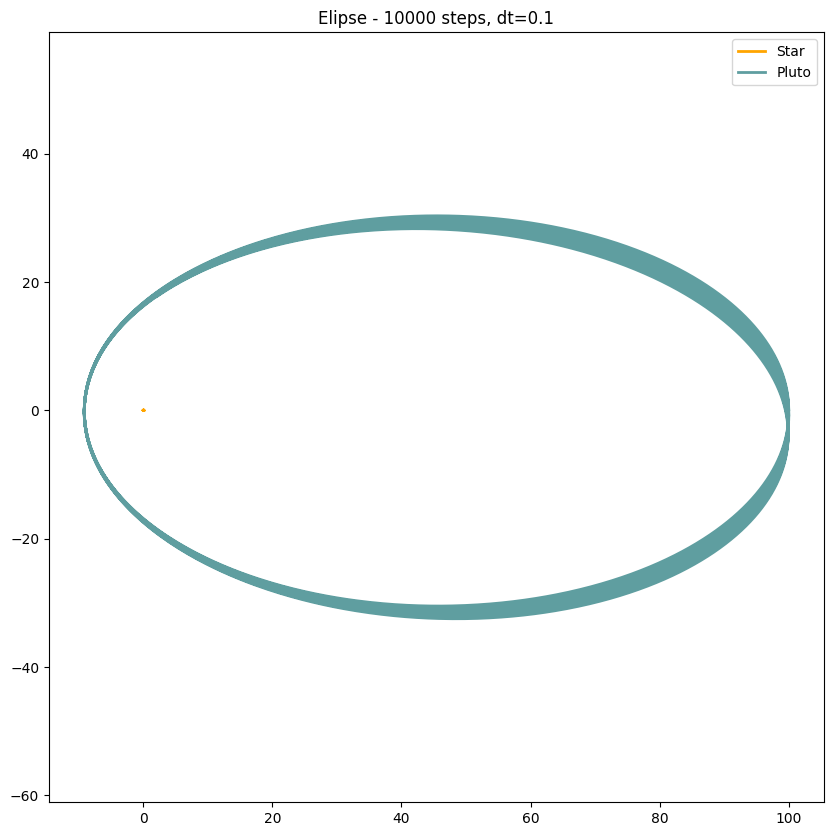

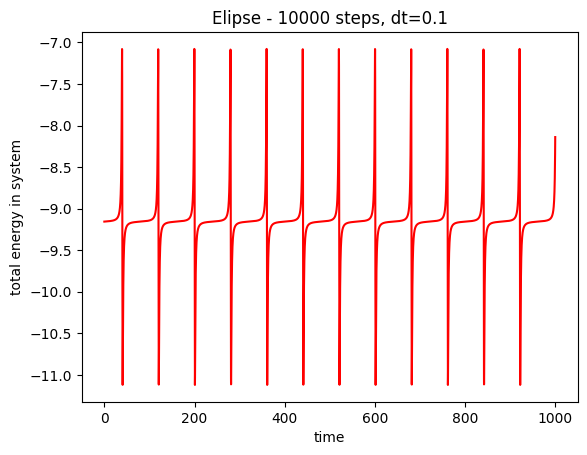

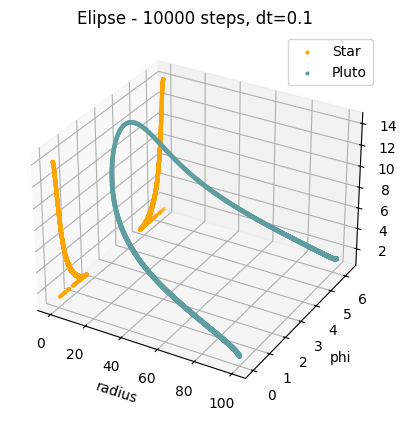

In [15]:
p = ParticleFactory("Elipse")
p.removeOffsetSpeed()
s = Simulate(h=0.1, n=10000)
a = Animate(p, s.verlet)

a.pathPlot()
a.energyPlot()
a.phaseSpace()
a.closePlot()

Das Ergebnis des Programms lässt schon eindeutig eine Ellipse erkennen, jedoch wird die Ellipse nicht wie in den Keplerschen Gesetzen vorausgesagt genau erhalten, sondern der Planet nimmt bei jeder Umrundung eine leicht gedrehte Bahn, als würde die Elliptische Bahn auch um den Stern kreisen. Dieser Effekt verstärkt sich wenn man die genauigkeit verringert, also den Verlet-Algorithmus mit weniger, größeren Iterationsschritten ausführt.
Interessant ist dabei, dass bei echten Planetenbahnen ähnliche Effekte auftreten, wenn man relativistische Effekte beachtet.
Am Energiegraphen sieht man, dass die Energie bei sehr elliptischen Bahnen bei Berechnung mit dem Vertet-Algorithmus stark schwankt aber nach einer vollen Bahn auf der Ellipse erhalten ist. Die Amplitude dieser Schwankung verringert sich mit kleineren Iterationsschritten. So ist der Ausschlag bei:

- dt = 0.1 noch $2 / 9 = 22\%$
- dt = 0.01 schon $0.2 / 9 = 2.2\%$

#### 2 Sonnen System

In Star Wars gibt es den Planeten Tatooine, der Teil eines Doppelsternsystems ist. Wie sich so ein System verhalten könnte, lässt sich natürlich mit unserem Programm herausfinden.

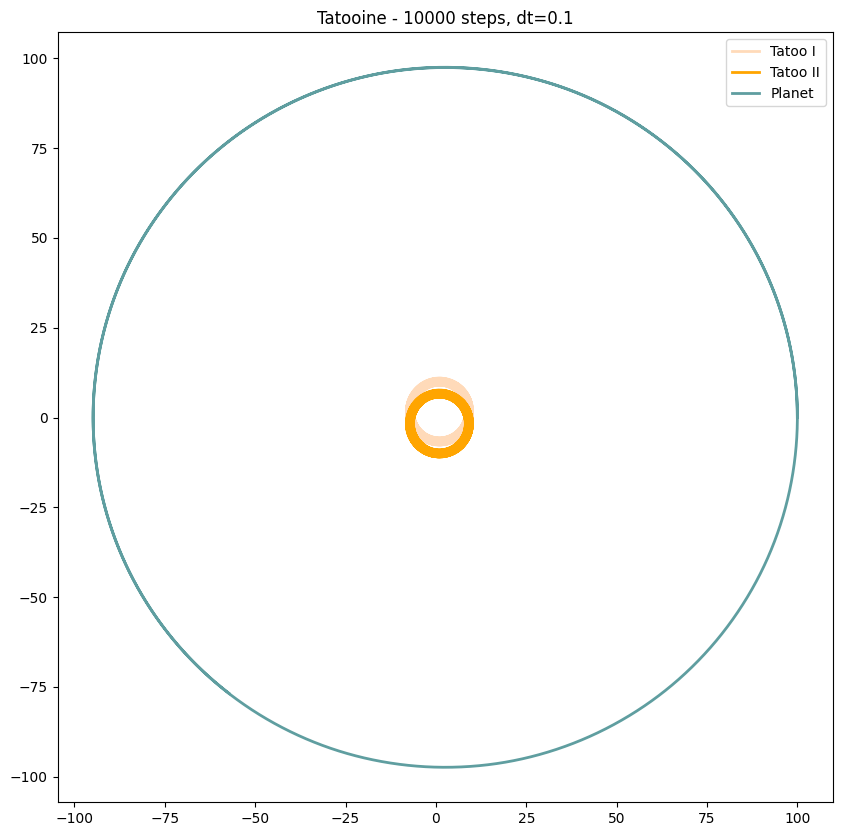

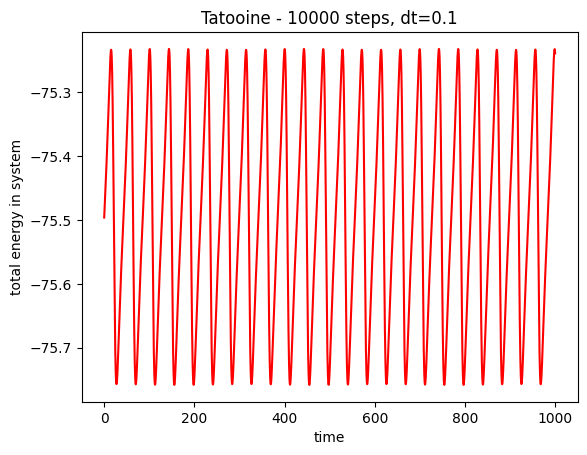

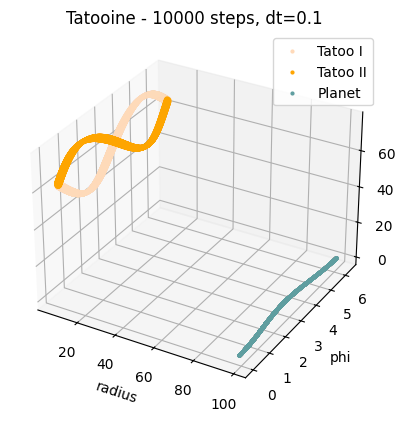

In [16]:
p = ParticleFactory("Tatooine")
p.removeOffsetSpeed()
s = Simulate(h=0.1, n=10000)
a = Animate(p, s.verlet)

a.pathPlot()
a.energyPlot()
a.phaseSpace()
a.closePlot()

Eine Implementation nahe an der Situation wie sie in Star Wars erscheint, nämlich, dass der Planet die beiden Sterne mit relativ großem Abstand umkreist, während die beiden Sterne relativ eng umeinander kreisen, ist vielleicht etwas entäuschend, denn der Planet umkreist einfach den schwerpunkt der beiden Sterne und man erkennt keinen großen unterschied zu der Situation, dass man die beiden Sterne durch einen Stern mit der Summe der Massen ersetzen würde. Ein weniger triviales System erhält man wie folgt:

#### Variation mit Startpunkt des Planeten zwischen den Sternen



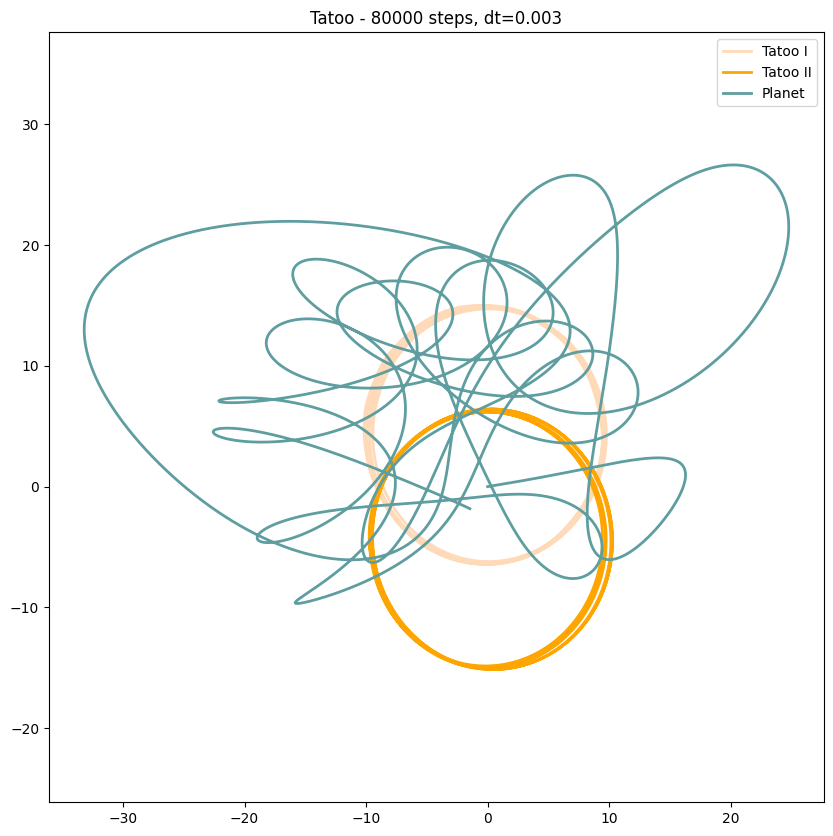

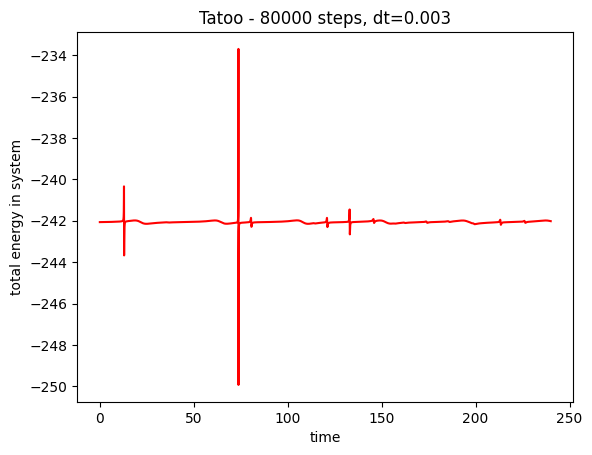

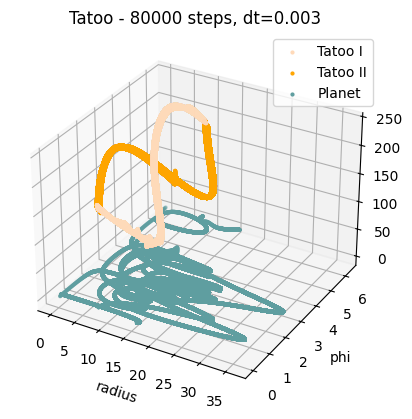

In [17]:
p = ParticleFactory("Tatoo")
p.removeOffsetSpeed()
s = Simulate(h=0.003, n=80000)
a = Animate(p, s.verlet)

a.pathPlot()
a.energyPlot()
a.phaseSpace()
a.closePlot()

Das System ist im Bezug auf Realismus und numerische Instabilität schwierig, wir haben für diese Simulation von allen den kleinsten Zeitschritt benötigt um die Planetenbahn zu berechnen. Der Planet fällt häufiger auf einen der Sterne oder zumindest nur sehr knapp an ihm vorbei und wird dabei sehr schnell.

#### Moon System

Versuchte man, das System Erde-Sonne-Mond zu simulieren, gäbe es ein Problem das ganze maßstabsgetreu und anschaulich zugleich darzustellen, denn der Abstand zwischen Erde und Mond ist gegenüber dem Abstand der beiden zur Sonne so klein, dass man die Bahnen von Erde und Mond auf einer maßstabsgerechten Darstellung kaum unterscheiden kann, wenn man die gesamte Bahn im Blick behalten möchte.
Interessant wäre doch herauszufinden, ob es auch stabile Stern-Planet-Mond-Konstellationen gibt, bei denen die Mondbahn sichtbar große Schwankungen um die Planetenbahn macht.

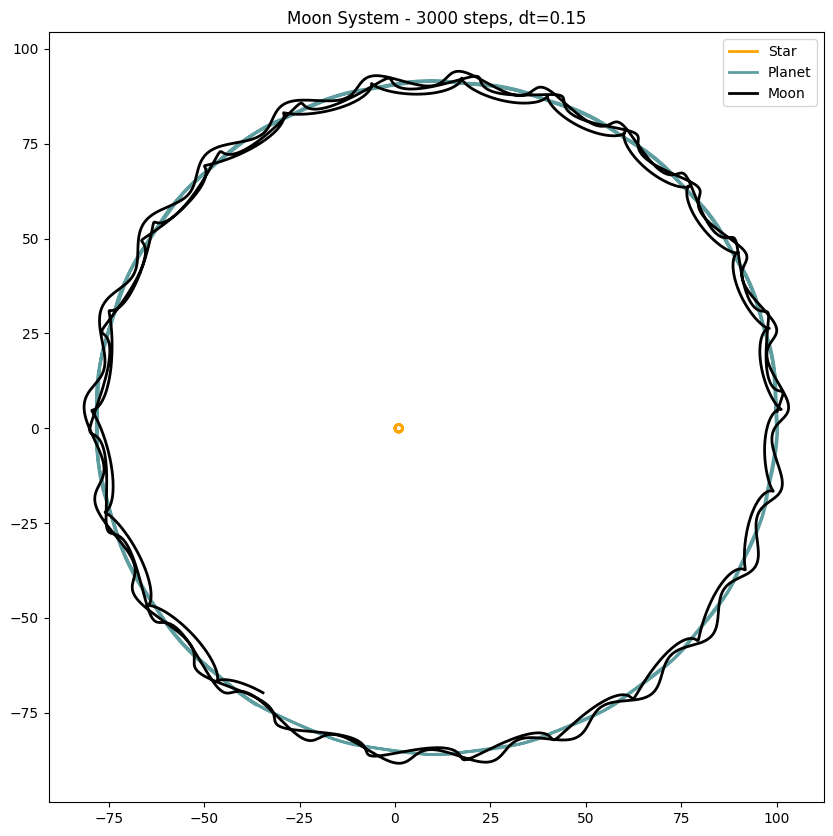

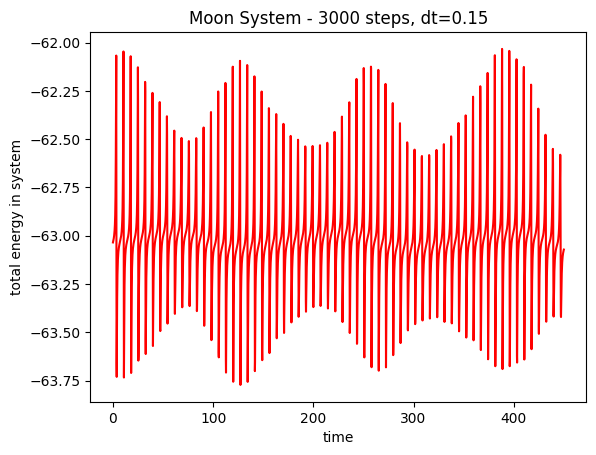

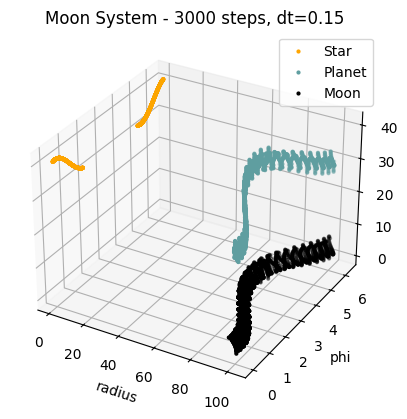

In [18]:
p = ParticleFactory("Moon System")
p.removeOffsetSpeed()
s = Simulate(h=0.15, n=3000)
a = Animate(p, s.verlet)

a.pathPlot()
a.energyPlot()
a.phaseSpace()
a.closePlot()

#### Solarsystem

Eine Simulation unseres Sonnensystems darf natürlich nicht fehlen.
Es ist auch gut, um zu testen, dass das Programm auch mit echten Werten funktioniert.

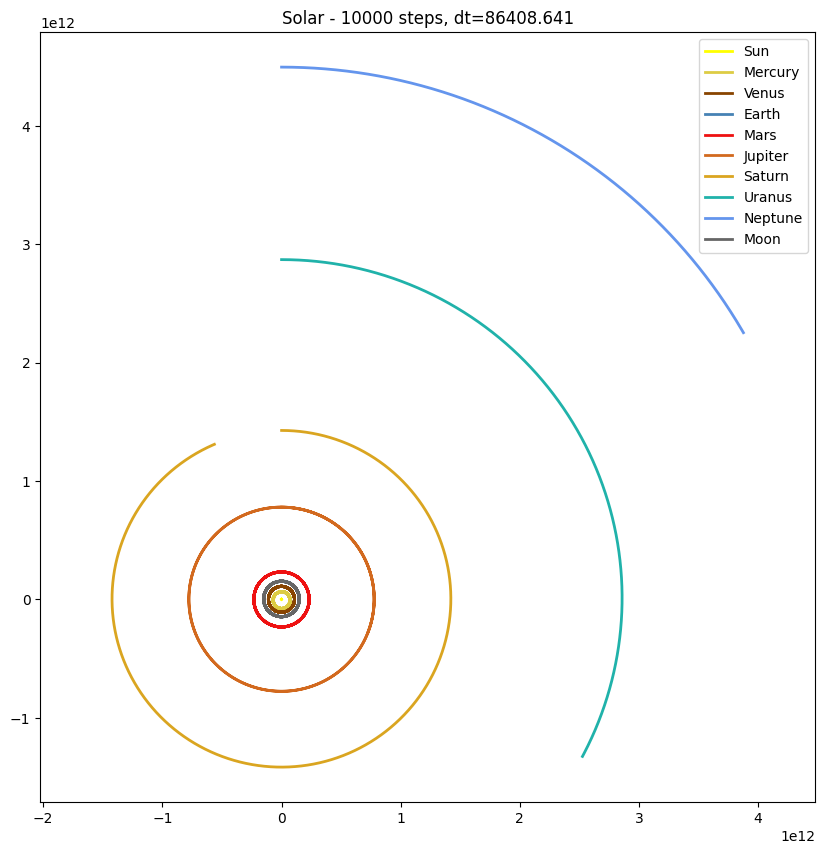

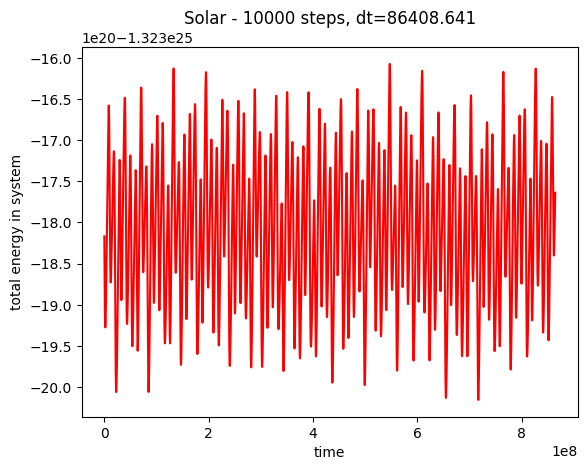

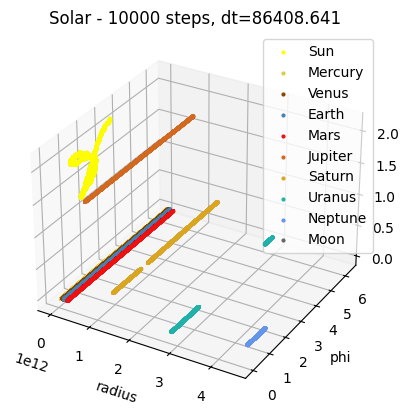

In [19]:
p = ParticleFactory("Solar")
p.removeOffsetSpeed()
s = Simulate(h=24*60*60, n=10000)
a = Animate(p, s.verlet)

a.pathPlot()
a.energyPlot()
a.phaseSpace()
a.closePlot()

#### Lagrangepunkte

Ein gewisser Herr Lagrange hat mal 5 Punkte in einem 2-Körper-System ausgerechnet an denen keine Kraft auf einen potentiell dort befindlichen kleinen Körper wirken sollte. Hier eine Simulation, in der 3 dieser Punkte mit solchen kleinen Körpern besetzt sind, 2 davon sollten Stabil sein.

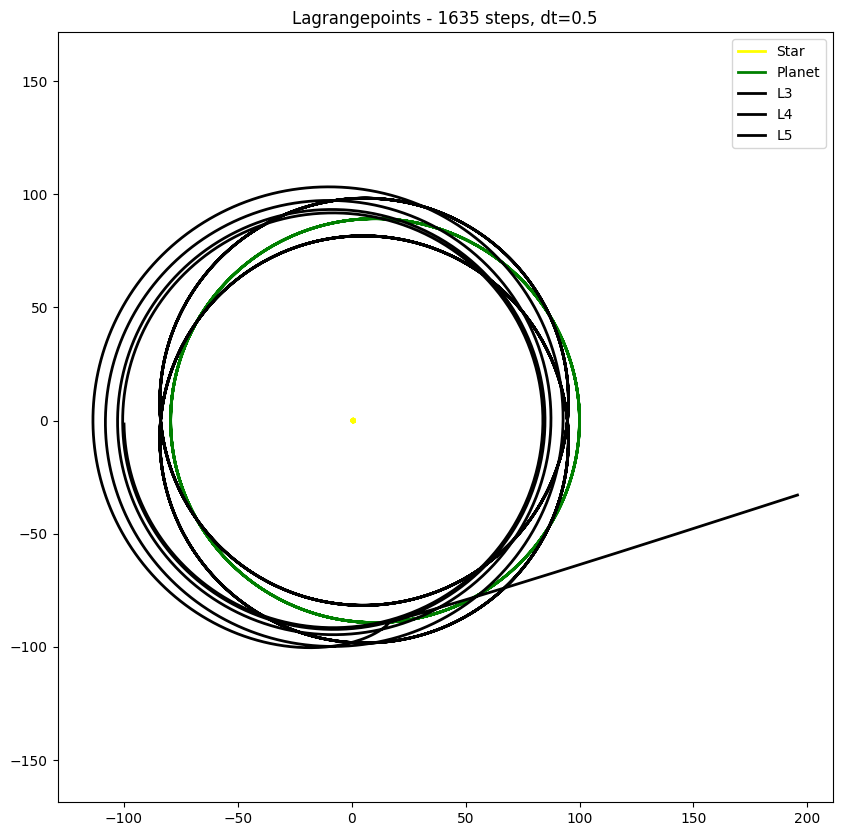

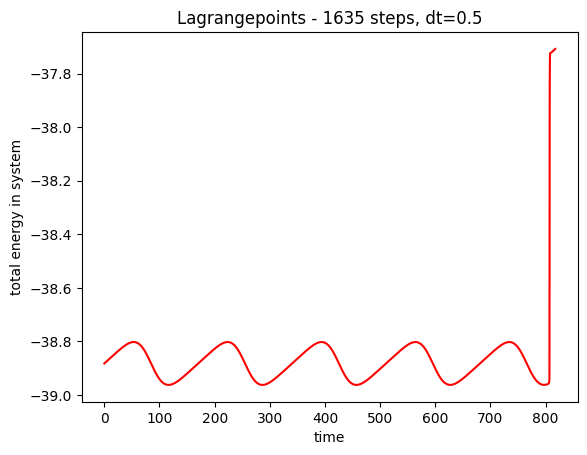

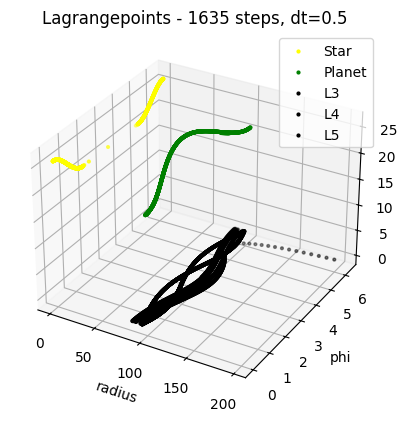

In [20]:
p = ParticleFactory("Lagrangepoints")
p.removeOffsetSpeed()
s = Simulate(h=0.5, n=1635)
a = Animate(p, s.verlet)

a.pathPlot()
a.energyPlot()
a.phaseSpace()
a.closePlot()

In der Simulation sieht man, dass die Körper an den Lagrangepunkten tatsächlich eine weile verweilen, nach einer Weile (je höher man den Zeitschritt dt wählt um so eher) drifted der Körper am instabilen L3 allerdings ab und verlässt in der Simulation sehr schnell das Sonnensystem. Interessant, ist hier dass die physikalische Instabilität für numerische Instabilität sorgt.